###**1. Project Overview**

* Objective: Analyze retail sales transactions to understand profitability, product performance, and consumer behaviour across countries and time.

* Data Source: Provided transactional dataset from Jan 2015 to July 2016.

####**Executive Summary**

This project analyzes the **Cost of Living Index (2022)** across 130+ countries using Python. The goal is to explore affordability, cost components, and economic strength.

**✅ Key Highlights:**
- Switzerland and Bermuda top the list in cost of living.
- India ranks highest in **affordability score**, combining low cost with moderate purchasing power.
- PCA and clustering reveal **economic zones** globally.
- Regression shows a **positive correlation** between living cost and income, with notable exceptions.
- Radar and comparison charts highlight disparities between countries like **India, USA, Switzerland, and UAE**.

> ➡️ A comprehensive, visual-first approach uncovers hidden global economic structures and affordability profiles.

###**2. Data Preparation**

In [1]:
import pandas as pd

#Load Data

df = pd.read_csv("/content/Cost_of_Living_Index_2022.csv")


In [2]:
#Basic cleaning

df.columns = df.columns.str.strip()  # Keep original format for this case

df.dropna(inplace = True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB
None


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


###**3. Exploratory Data Analysis (EDA)**

A. Distribution Plots

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

a) Top 20 Countries by Cost of Living Index:

<ipython-input-5-ef9cf5224e86>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted.head(20), x = "Country", y = "Cost of Living Index", palette = "Blues_d")


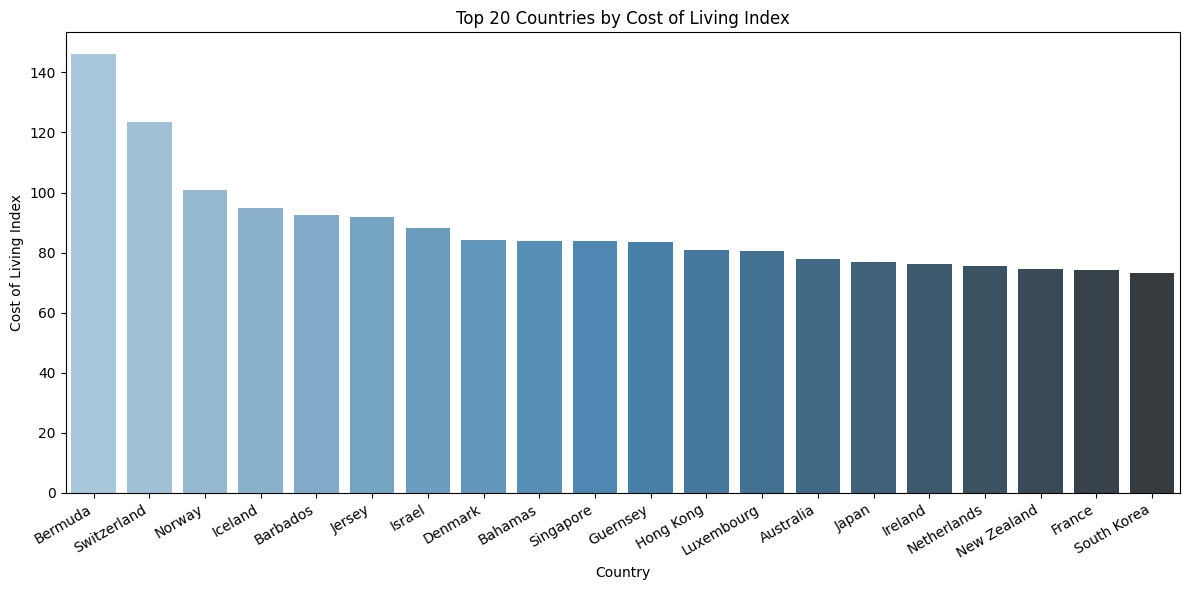

In [5]:
# Sort by cost of living index for better labeling
df_sorted = df.sort_values("Cost of Living Index", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted.head(20), x = "Country", y = "Cost of Living Index", palette = "Blues_d")
plt.xticks(rotation=30, ha="right")

plt.title("Top 20 Countries by Cost of Living Index")
plt.xlabel("Country")
plt.ylabel("Cost of Living Index")
plt.tight_layout()

plt.show()

**Conclusion:**

* The bar plot of the Top 20 countries by Cost of Living Index reveals that countries like **Bermuda**, **Switzerland**, and **Norway** top the list with significantly higher costs.
  * These nations typically have stronger currencies, high wages, and expensive real estate or imported goods.

* Meanwhile, other advanced economies such as **Australia**, **Netherlands**, and **France** also appear, but with more moderate index values.

This visualization clearly highlights geographic disparities in cost burdens and helps frame affordability comparisons in a global context.




b) Top 20 Countries by Rent Index:

<ipython-input-6-0acf256251a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rent_sorted.head(20), x = "Country", y = "Rent Index", palette = "Purples_d")


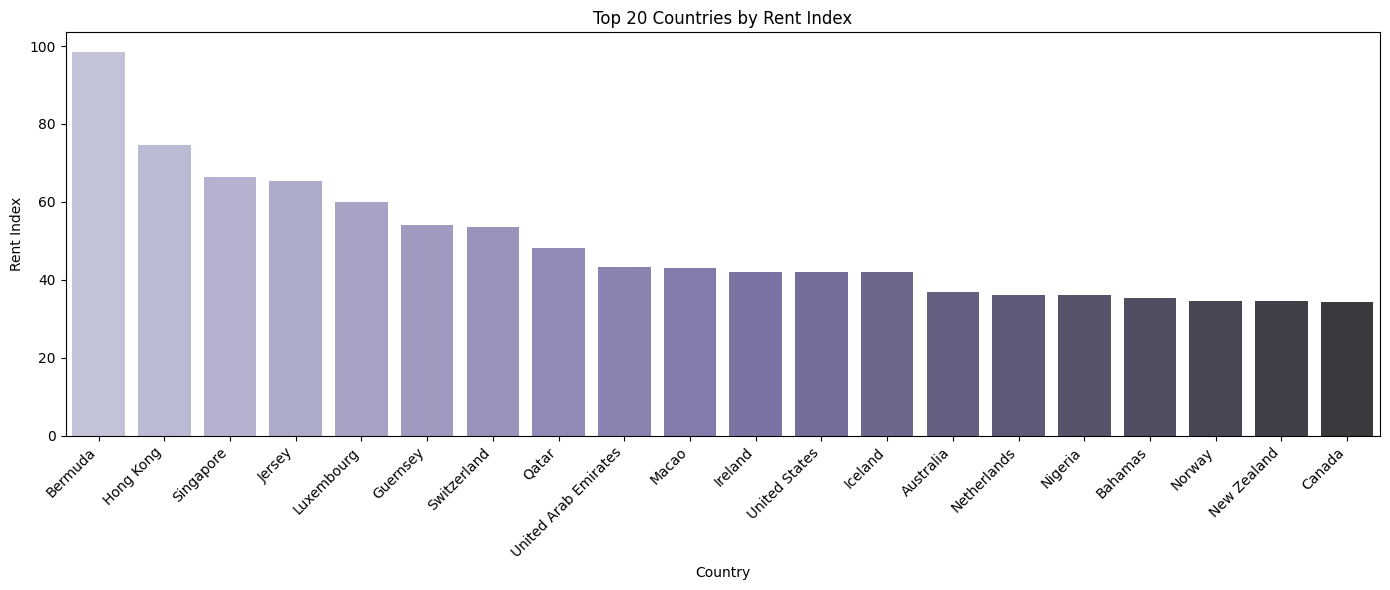

In [6]:
# Top 20 countries by Rent Index
rent_sorted = df.sort_values("Rent Index", ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=rent_sorted.head(20), x = "Country", y = "Rent Index", palette = "Purples_d")
plt.xticks(rotation=45, ha="right")

plt.title("Top 20 Countries by Rent Index")
plt.xlabel("Country")
plt.ylabel("Rent Index")
plt.tight_layout()

plt.show()

**Conclusion:**

* The Rent Index plot highlights that countries like **Hong Kong**, **Bermuda**, and **Singapore** have the highest rental costs globally.
  * These are densely populated financial hubs where demand for limited housing drives up prices.




c) Top 20 Countires by Purchasing Power Index:

<ipython-input-7-887e7a2b93e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=power_sorted.head(20), x = "Country", y = "Local Purchasing Power Index", palette="Greens_d")


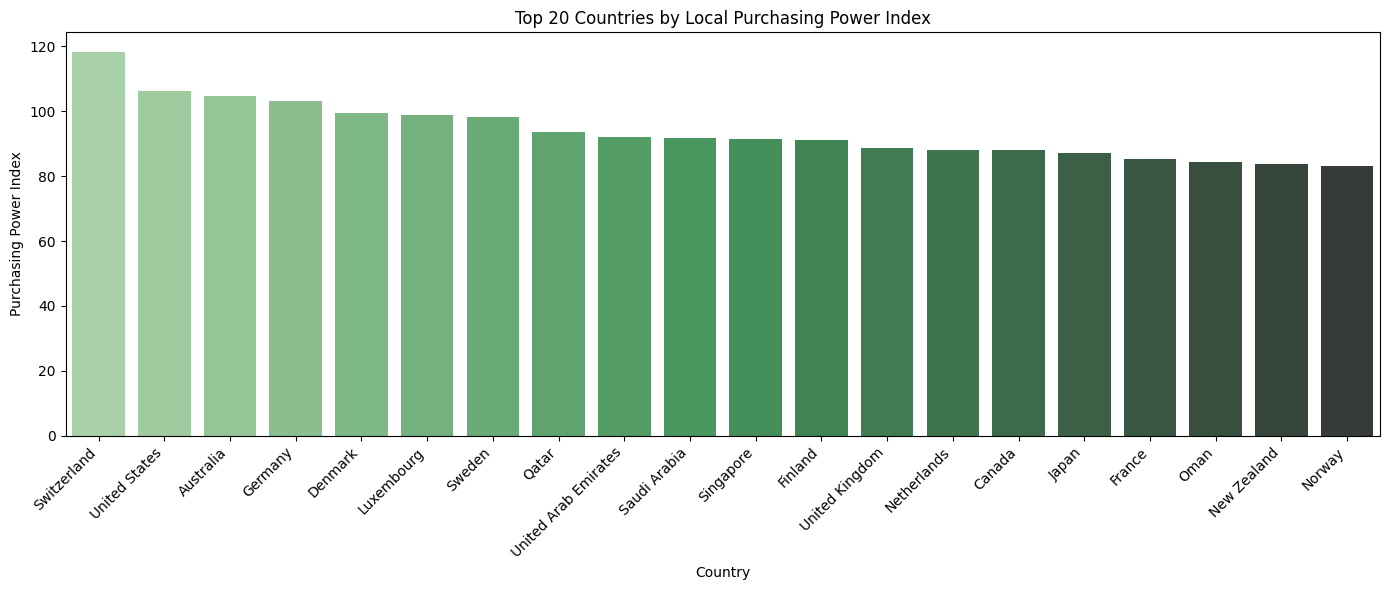

In [7]:
# Top 20 countries by Purchasing Power
power_sorted = df.sort_values("Local Purchasing Power Index", ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=power_sorted.head(20), x = "Country", y = "Local Purchasing Power Index", palette="Greens_d")
plt.xticks(rotation=45, ha="right")

plt.title("Top 20 Countries by Local Purchasing Power Index")
plt.xlabel("Country")
plt.ylabel("Purchasing Power Index")
plt.tight_layout()

plt.show()

**Conclusion:**

* This plot shows that countries like **Switzerland**, **United States**, and **Australia** have the highest local purchasing power.
  * This means residents in these countries can afford more goods and services relative to the local cost, making them economically powerful even if the cost of living is high.

* This adds valuable contrast to the Rent and Cost of Living insights, reinforcing that high cost doesn't always imply low affordability.


**d) Side-by-Side Comparison – Cost of Living vs Purchasing Power:**

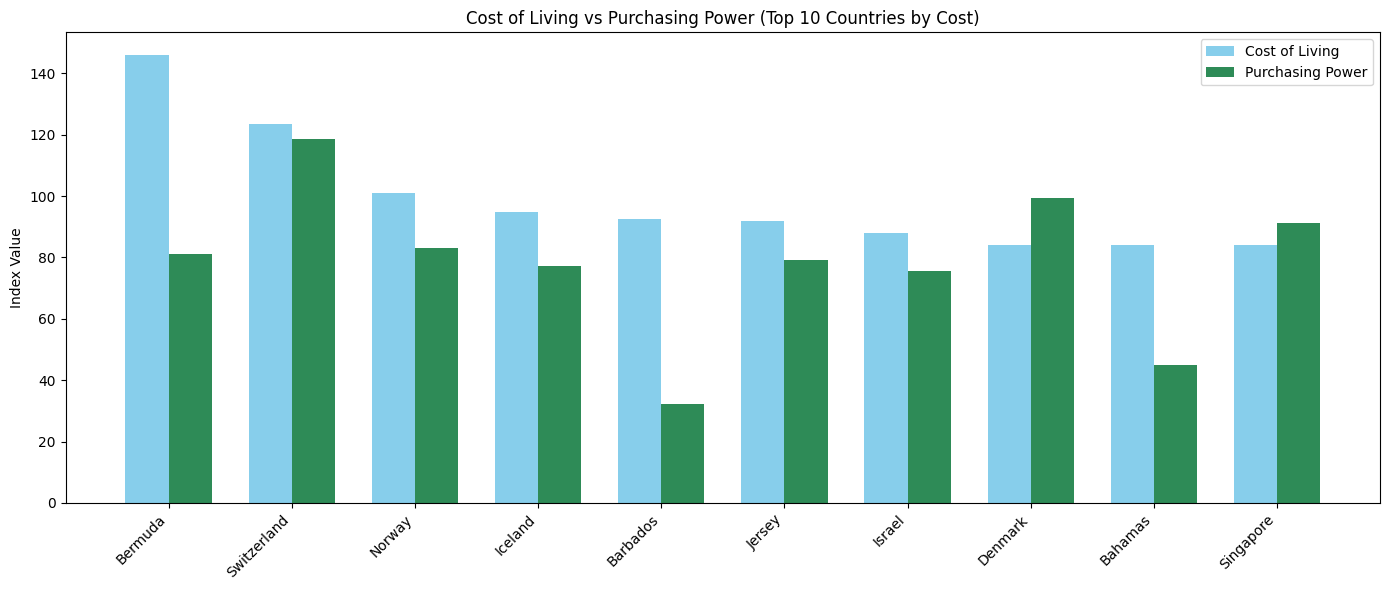

In [8]:
# Merge top countries by Cost of Living with Purchasing Power

comparison_df = df[["Country", "Cost of Living Index", "Local Purchasing Power Index"]]
comparison_df = comparison_df.sort_values("Cost of Living Index", ascending=False).head(10)

# Plot side-by-side bars
import numpy as np
x = np.arange(len(comparison_df))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, comparison_df['Cost of Living Index'], width, label ='Cost of Living', color ='skyblue')
plt.bar(x + width/2, comparison_df['Local Purchasing Power Index'], width, label ='Purchasing Power', color='seagreen')

plt.xticks(x, comparison_df['Country'], rotation=45, ha='right')
plt.ylabel("Index Value")
plt.title("Cost of Living vs Purchasing Power (Top 10 Countries by Cost)")
plt.legend()
plt.tight_layout()

plt.show()

**Conclusion:**

The comparison of **Cost of Living vs. Purchasing Power** among the top 10 costliest countries reveals stark contrasts.

* Countries like **Switzerland** and **Singapore** maintain a strong balance between high costs and high purchasing power, indicating robust wage structures and economic strength.

* In contrast, countries such as **Barbados** and **Bahamas** have high living costs but significantly lower purchasing power, indicating economic strain for residents.


This visualization effectively highlights global disparities in affordability and financial well-being.



**e) Side-by-Side Comparison – Rent vs Purchasing Power:**

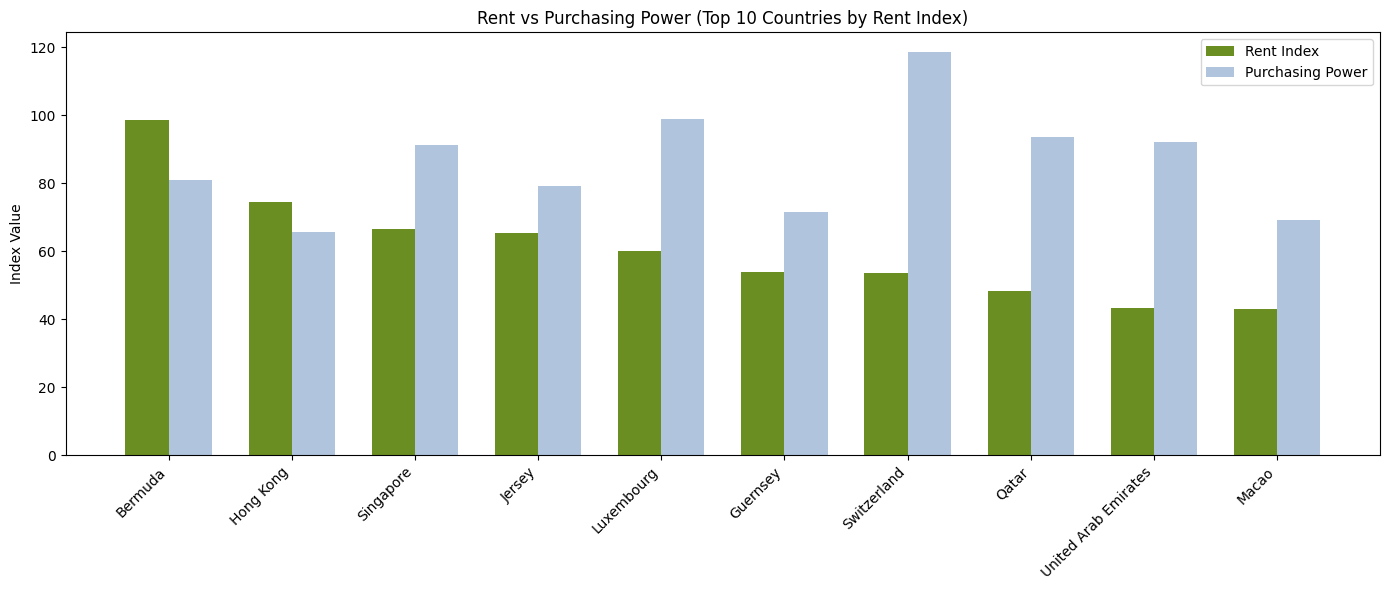

In [9]:
# Top 10 countries by Rent Index
rent_top10 = df.sort_values("Rent Index", ascending=False).head(10)

# Prepare side-by-side comparison with purchasing power
x = np.arange(len(rent_top10))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, rent_top10['Rent Index'], width, label = 'Rent Index', color = 'olivedrab')
plt.bar(x + width/2, rent_top10['Local Purchasing Power Index'], width, label = 'Purchasing Power', color = 'lightsteelblue')

plt.xticks(x, rent_top10['Country'], rotation = 45, ha ='right')
plt.ylabel("Index Value")
plt.title("Rent vs Purchasing Power (Top 10 Countries by Rent Index)")
plt.legend()
plt.tight_layout()
plt.show()


**Conclusion:**

* The side-by-side comparison of **Rent Index and Purchasing Power** reveals that countries like **Bermuda** and **Hong Kong** have disproportionately high rent compared to what residents can afford, which may signal housing affordability stress.

* Conversely, countries like **Switzerland**, **Qatar**, and **UAE** demonstrate high purchasing power relative to rent, reflecting more balanced or even favorable economic conditions for residents.


This visualization is especially useful for assessing housing strain across wealthy versus developing nations.


B. Correlation Heatmap

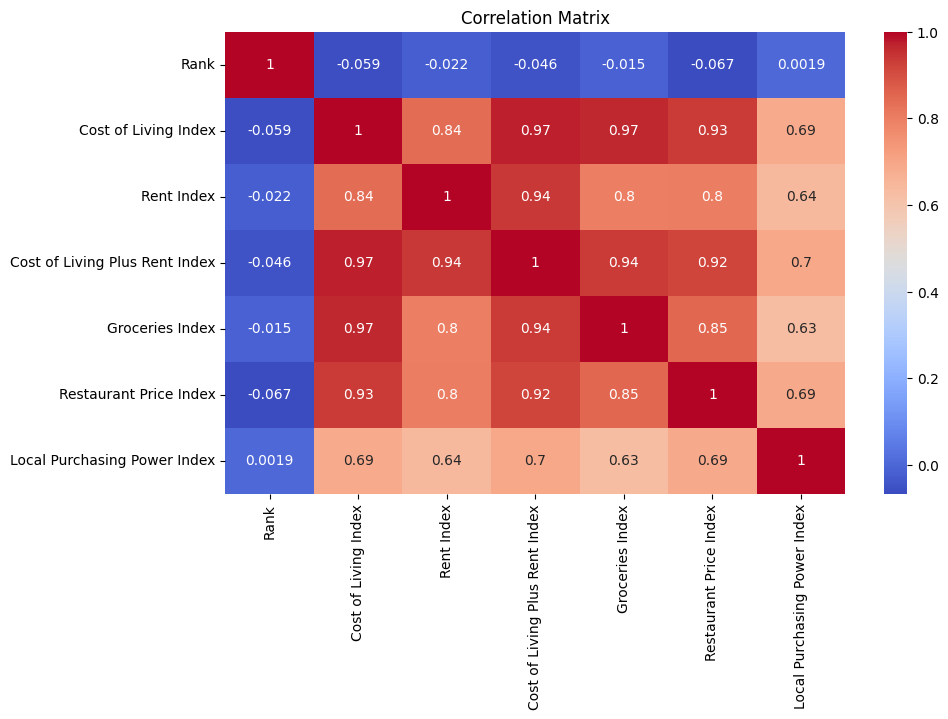

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Conclusion:**

* The correlation matrix highlights strong positive relationships between the **Cost of Living Index**, **Rent Index**, **Groceries Index**, and **Restaurant Price Index** — all scoring above 0.80 correlation.

  * This indicates that higher cost of living is typically driven by high housing and food costs.

* The **Cost of Living Plus Rent Index** is especially well-aligned with both, confirming its role as a comprehensive indicator.

* Interestingly, **Local Purchasing Power Index** shows only a moderate correlation with these cost metrics, suggesting that high cost does not necessarily mean low purchasing power — some expensive countries still offer high income and affordability levels.


###**4. Product Performance / Index Breakdown**


Scatter Plot - Purchasing Power vs Cost of Living Index:

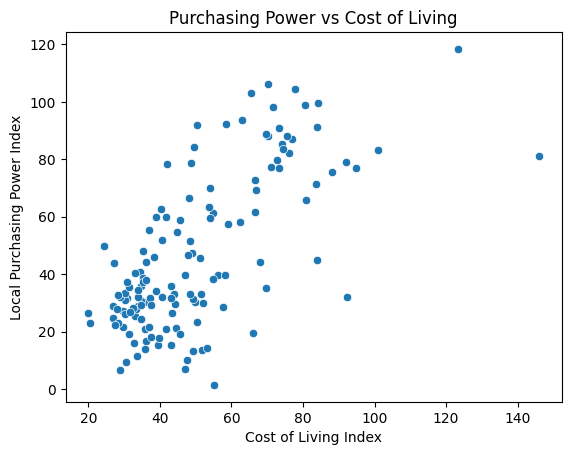

In [11]:
#Top 10 Countries by Cost of Living:

df.sort_values("Cost of Living Index", ascending=False).head(10)

#Top by Purchasing Power:

df.sort_values("Local Purchasing Power Index", ascending=False).head(10)

sns.scatterplot(data = df, x = "Cost of Living Index", y = "Local Purchasing Power Index")
plt.title("Purchasing Power vs Cost of Living")

plt.show()

**Conclusion:**

* The scatter plot reveals a **moderate positive relationship** between cost of living and purchasing power.

* Generally, countries with higher living costs tend to also exhibit higher purchasing power — suggesting that wages and income often adjust to match expenses in more developed economies.  

* However, the spread of points also indicates significant **variation**, especially among countries with mid-to-high cost levels, where purchasing power differs widely.  

* This highlights that **high living costs do not guarantee affordability**, and purchasing power must be evaluated independently when assessing economic well-being.

###**5. Geographic Visualization (Choropleth Map)**

In [12]:
import plotly.express as px

fig = px.choropleth(df, locations = "Country", locationmode = "country names",
                    color = "Cost of Living Index",
                    title = "Cost of Living Index by Country (2022)",
                    color_continuous_scale = "Spectral")
fig.show()

**Conclusion:**

* The choropleth map reveals distinct regional patterns in cost of living across the globe.  

* Western Europe, parts of North America, and select island nations such as **Switzerland**, **Norway**, and **Bermuda** show the **highest cost of living**, reflecting advanced economies, higher wages, and stronger currencies.

* Conversely, regions in **South Asia**, **Africa**, and parts of **Eastern Europe** exhibit **lower cost of living indices**, aligning with lower income levels and different consumption patterns.  

This visualization effectively communicates how economic conditions vary by geography and highlights global disparities in affordability and consumer cost burden.

###**6. Clustering by Economic Profiles**

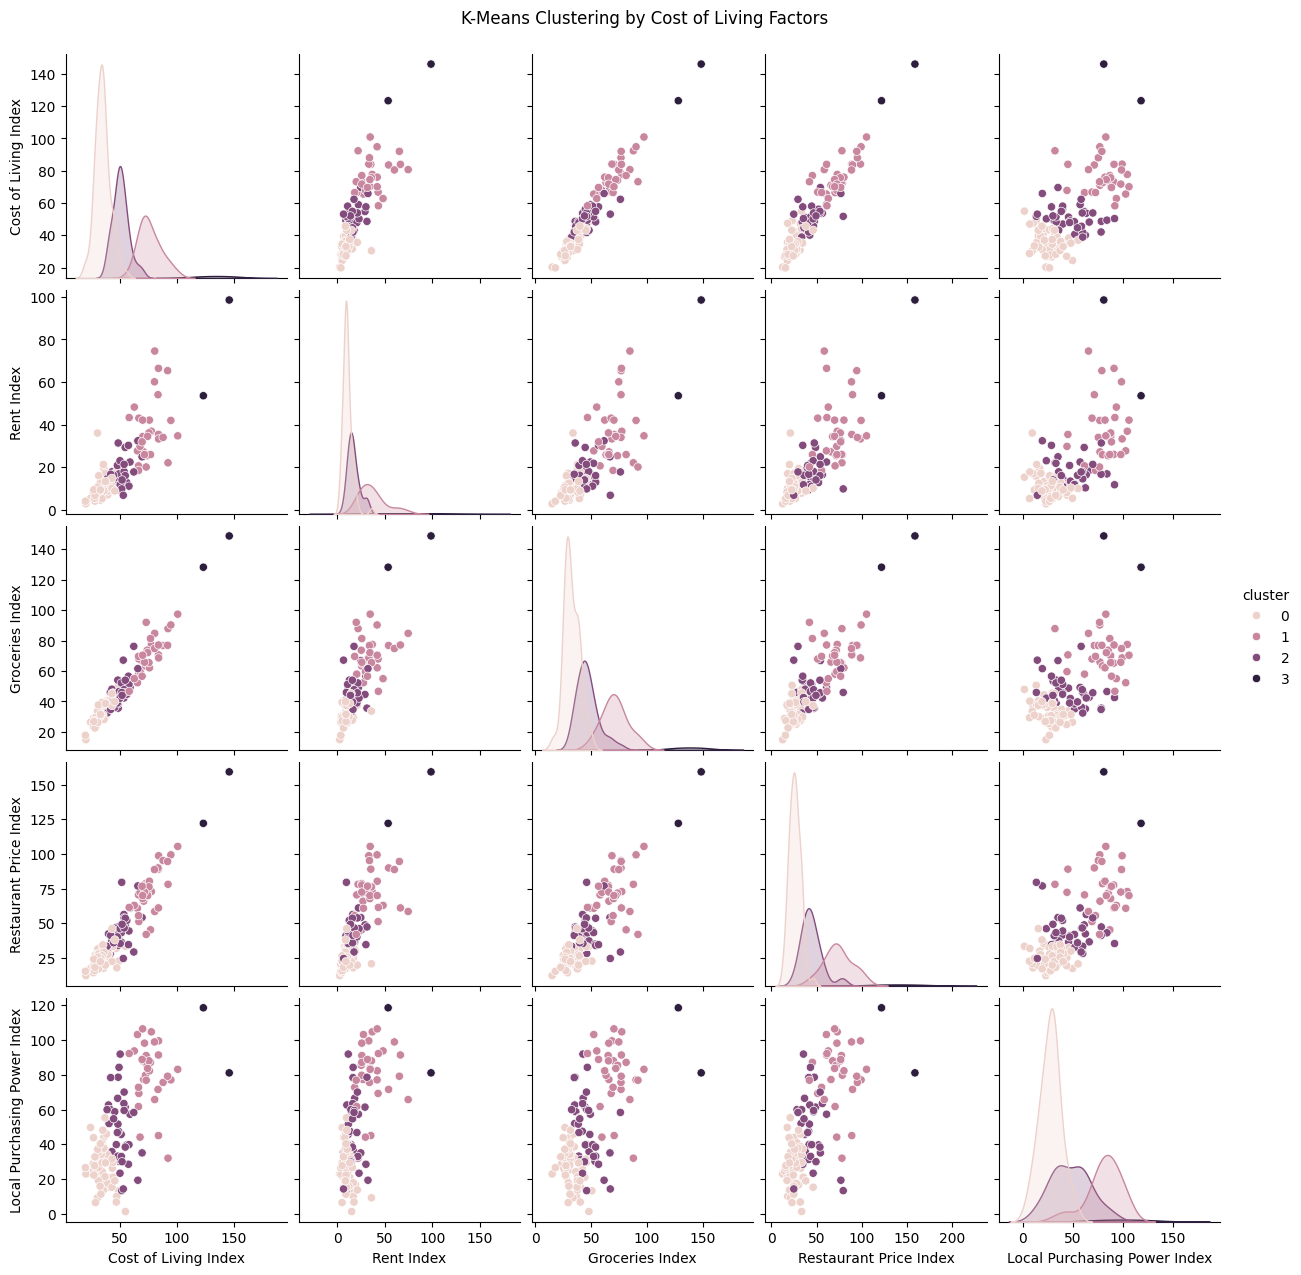

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df[["Cost of Living Index", "Rent Index", "Groceries Index", "Restaurant Price Index", "Local Purchasing Power Index"]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, hue="cluster", vars=X.columns)
plt.suptitle("K-Means Clustering by Cost of Living Factors", y=1.02)
plt.show()

**Conclusion:**


* The K-Means clustering analysis segmented countries into **4 distinct economic groups** based on cost-related indices including rent, groceries, restaurants, and local purchasing power.  
  - One cluster represents countries with **very high costs and purchasing power** (e.g., Switzerland, Bermuda).  
  - Another includes countries with **low cost and low purchasing power**, reflecting more economically constrained regions.  
  - Intermediate clusters capture countries with moderate costs but varied purchasing power, reflecting mixed affordability profiles.  

* The clustering outcome confirms clear **global economic stratification** and supports the idea that cost and affordability patterns differ in meaningful, segmentable ways.  

This unsupervised learning approach is particularly valuable for **market segmentation, policy design, and comparative economic strategy**.

###**7. Economic Interpretation - Scatterplot with zones**

Text(0.5, 1.0, 'Economic Zones: Cost of Living vs Purchasing Power')

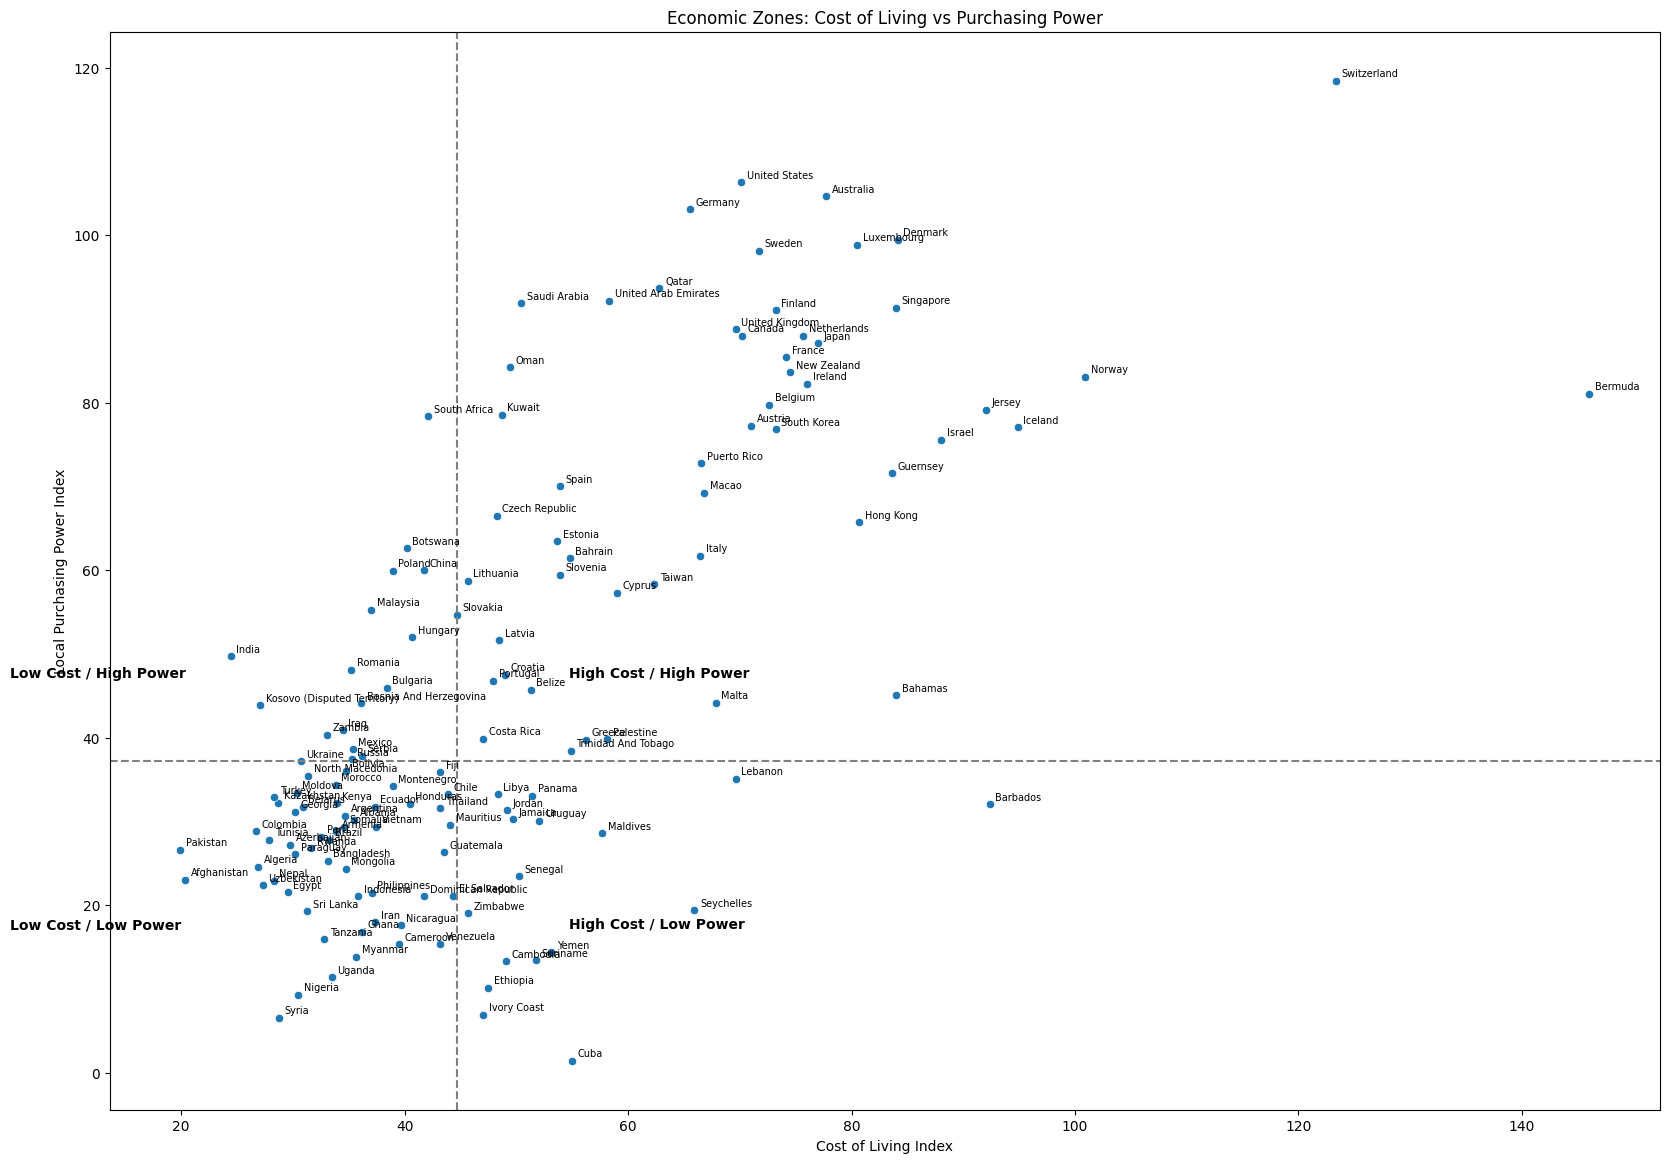

In [14]:
plt.figure(figsize=(20, 14))
sns.scatterplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index")

for i in range(df.shape[0]):
    plt.text(x=df["Cost of Living Index"][i] + 0.5,
             y=df["Local Purchasing Power Index"][i] + 0.5,
             s=df["Country"][i],
             fontsize=7)

x_median = df["Cost of Living Index"].median()
y_median = df["Local Purchasing Power Index"].median()

plt.axvline(x=x_median, color="gray", linestyle="--")
plt.axhline(y=y_median, color="gray", linestyle="--")
plt.text(x_median + 10, y_median + 10, 'High Cost / High Power', fontsize=10, weight='bold')
plt.text(x_median + 10, y_median - 20, 'High Cost / Low Power', fontsize=10, weight='bold')
plt.text(x_median - 40, y_median + 10, 'Low Cost / High Power', fontsize=10, weight='bold')
plt.text(x_median - 40, y_median - 20, 'Low Cost / Low Power', fontsize=10, weight='bold')

plt.xlabel("Cost of Living Index")
plt.ylabel("Local Purchasing Power Index")

plt.title("Economic Zones: Cost of Living vs Purchasing Power")

**Conclusion:**

The quadrant-based scatterplot clearly segments countries into four economic profiles:
- **High Cost / High Power**: Wealthy, developed nations like Switzerland where high wages match high living costs.
- **Low Cost / High Power**: Countries like Qatar or UAE offer strong purchasing power despite moderate living costs — ideal economic zones.
- **High Cost / Low Power**: Economically strained countries (e.g., island economies) where high expenses are not supported by income.
- **Low Cost / Low Power**: Developing economies like India or Egypt, where both incomes and costs are low.

This interpretation helps visualize how affordability is not solely tied to expenses, but also to income strength.

###**8. Affordability Score**

> The **Affordability Score** — defined as purchasing power divided by cost of living — provides a normalized view of economic balance.

<ipython-input-15-3a821e2a9ae5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




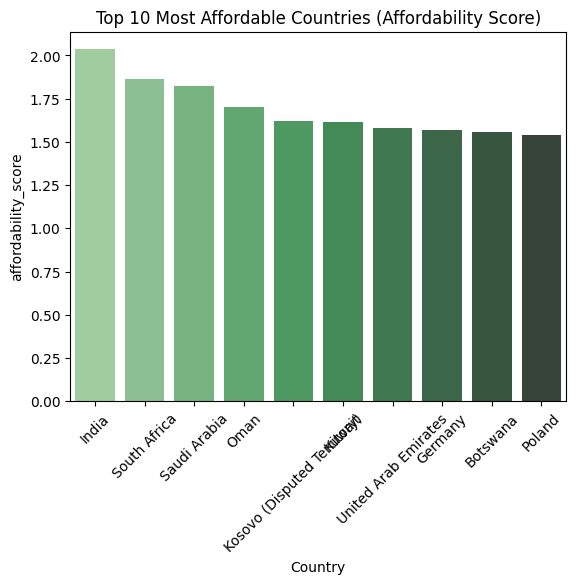

<ipython-input-15-3a821e2a9ae5>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




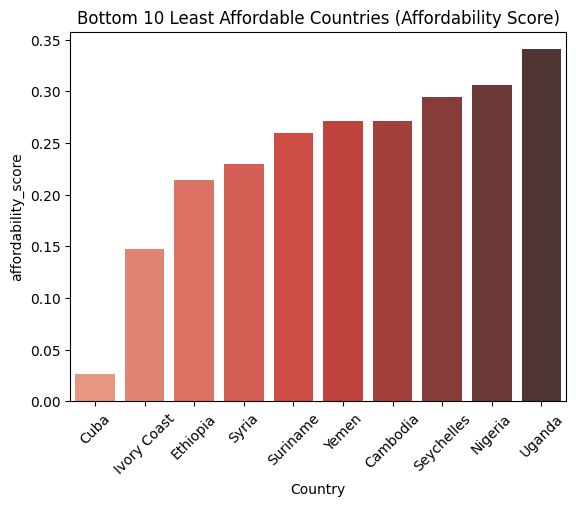

In [15]:
df["affordability_score"] = df["Local Purchasing Power Index"] / df["Cost of Living Index"]

# Top 10 Most Affordable
top_affordable = df.sort_values("affordability_score", ascending=False).head(10)
sns.barplot(data=top_affordable, x = "Country", y = "affordability_score", palette="Greens_d")
plt.title("Top 10 Most Affordable Countries (Affordability Score)")
plt.xticks(rotation=45)

plt.show()

# Bottom 10 Least Affordable
bottom_affordable = df.sort_values("affordability_score", ascending=True).head(10)
sns.barplot(data=bottom_affordable, x = "Country", y = "affordability_score", palette="Reds_d")
plt.title("Bottom 10 Least Affordable Countries (Affordability Score)")
plt.xticks(rotation=45)

plt.show()

**Conclusion:**


- **India** tops the chart with the highest affordability score (>2.0), indicating that the average Indian can afford significantly more relative to living costs.
- Countries like **South Africa, Saudi Arabia, and UAE** also demonstrate strong affordability, combining moderate costs with above-average income power.
- On the other end, countries like **Cuba, Ivory Coast, and Ethiopia** have very low affordability scores, signaling financial stress for residents.

This score is a powerful indicator of **economic well-being**, blending cost and income into one meaningful metric.

###**9. Principal Component Ananlysis (PCA)**

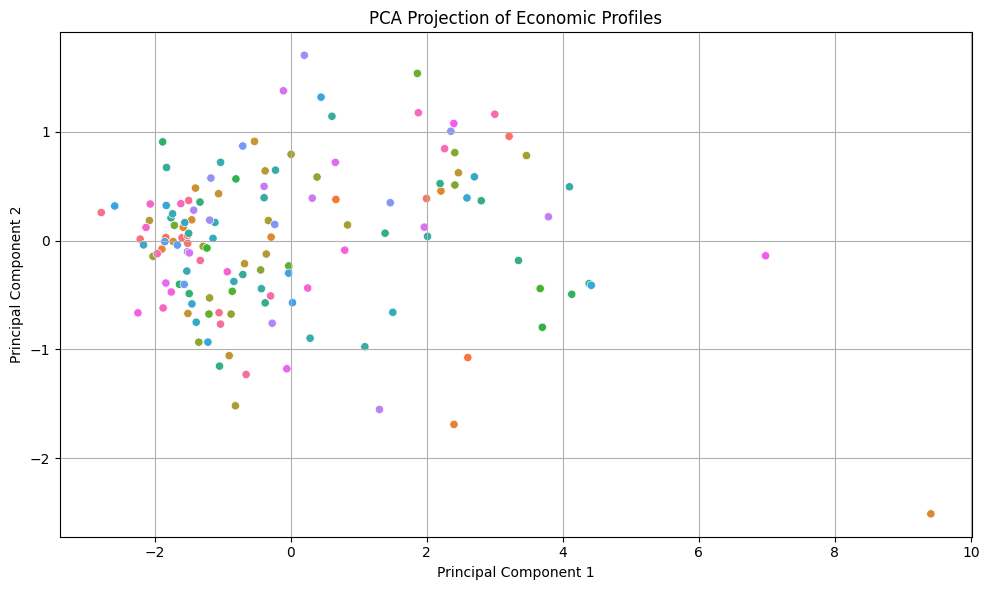

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 3: PCA
features = ["Cost of Living Index", "Rent Index", "Groceries Index",
            "Restaurant Price Index", "Local Purchasing Power Index"]

X = df[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
df_pca["Country"] = df.loc[X.index, "Country"].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_pca, x = "PCA1", y = "PCA2", hue = "Country", legend = False)



plt.title("PCA Projection of Economic Profiles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion:**

PCA reduces complex cost-of-living dimensions into two primary components, allowing us to visually group similar countries.

- Countries clustered near each other share similar economic characteristics (cost, rent, purchasing power, etc.).
- Outliers in the PCA plot highlight nations with highly unique cost structures (e.g., extremely high rent or purchasing power).
- This dimensionality reduction helps simplify multivariate comparisons and is a strong pre-step for clustering or segmentation tasks.

**Inspecting the PCA Loadings to Understand the Contribution of each Feature:**

In [17]:

pca_components = pd.DataFrame(
    pca.components_,
    columns=features,
    index=["PCA1", "PCA2"]
)

pca_components.T  # Transpose for better readability (features as rows)


,PCA1,PCA2
Cost of Living Index,0.479717,-0.211112
Rent Index,0.440165,-0.142543
Groceries Index,0.460507,-0.310571
Restaurant Price Index,0.463131,-0.097435
Local Purchasing Power Index,0.386742,0.910585


**🧠 What Do PCA1 and PCA2 Represent in this Case?**

🔹 PCA1 – Overall Cost Environment (Magnitude of Expense) Dominated by Cost of Living, Groceries, Rent, and Restaurants (all with high positive weights).

*Interpretation:*
  * Countries with high PCA1 scores are likely expensive economies overall, regardless of how much people earn.

Examples (likely): Switzerland, Bermuda, Iceland, etc.


🔸 PCA2 – Affordability Gradient (Power vs. Price) Dominated by Local Purchasing Power (+0.91) and negatively by Groceries and Living Costs.

*Interpretation:*

  * A high PCA2 score → High purchasing power, with relatively lower costs.

  * A low PCA2 score → Low income or power relative to high living costs.

This axis separates countries based on their economic balance or strain.


**📌Insights**:

* Countries in the top-right corner (high PCA1, high PCA2) are rich and expensive but also powerful economically (e.g., Switzerland).

* Bottom-right quadrant (high PCA1, low PCA2) represents economies under financial strain — high costs but weak purchasing power.

###**10. Regression Trendline**

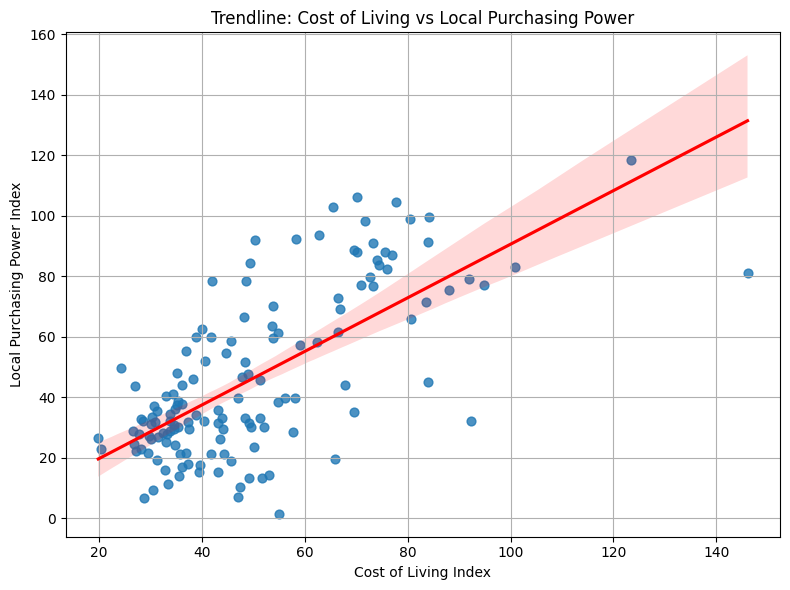

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="Cost of Living Index",
    y="Local Purchasing Power Index",
    scatter_kws={'s': 40},
    line_kws={'color': 'red'}
)
plt.title("Trendline: Cost of Living vs Local Purchasing Power")
plt.xlabel("Cost of Living Index")
plt.ylabel("Local Purchasing Power Index")
plt.grid(True)
plt.tight_layout()
plt.show()

**📈 Trendline Analysis: Cost of Living vs Local Purchasing Power**

* This regression plot provides a macro-level view of the relationship between cost of living and purchasing power across countries.

* The regression trendline reveals a moderate positive correlation between Cost of Living and Local Purchasing Power.

* In general, as the cost of living increases, purchasing power also tends to rise — reflecting stronger economies.


However, the spread around the trendline indicates significant variation among countries:

* Some nations offer high income relative to cost (above the line).
* Others struggle with lower purchasing power despite high living costs (below the line).

> This analysis supports that while economic growth boosts both wages and prices, the relationship is not uniform — emphasizing the need for country-specific affordability analysis.


**🔹 Key Insights:**

* The positive slope of the red trendline indicates that higher living costs are often accompanied by higher purchasing power.

* This supports the idea that wealthier nations tend to have both higher prices and higher incomes.

However, there's a wide dispersion around the line:

* Above the line: Countries where people earn more relative to costs (e.g., high purchasing power).

* Below the line: Countries where incomes lag behind the cost of living.

> This trendline offers a valuable benchmark, but it also shows that cost alone doesn’t determine affordability — income strength is just as critical.

###**11. Radar Chart - Comparing Countries vs INDIA**

In [19]:
from sklearn.preprocessing import MinMaxScaler

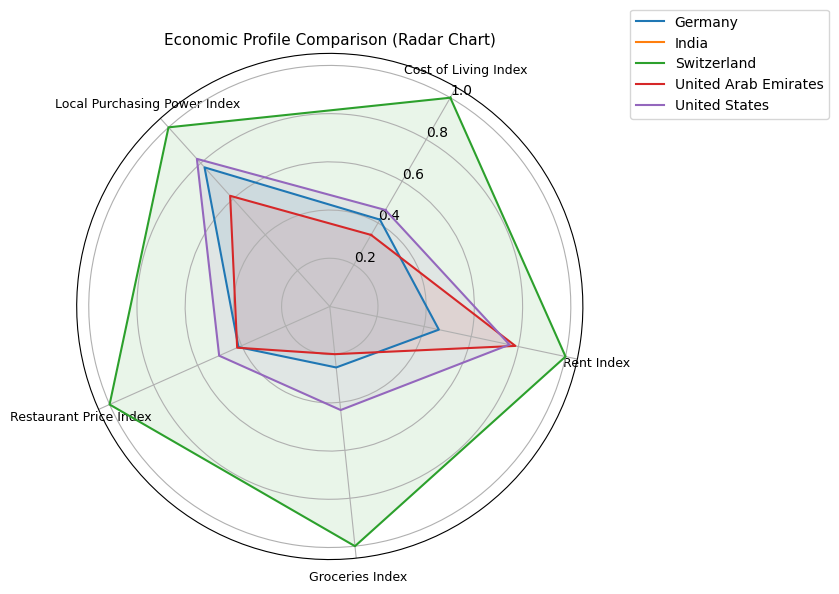

In [20]:
# Select countries for comparison
countries_to_compare = ["India", "Switzerland", "United States", "Germany", "United Arab Emirates"]
comparison_data = df[df["Country"].isin(countries_to_compare)].copy()

# Features for radar chart
radar_features = ["Cost of Living Index", "Rent Index", "Groceries Index", "Restaurant Price Index", "Local Purchasing Power Index"]

# Normalize data (0 to 1 scale) for fair radar plotting
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(comparison_data[radar_features])
comparison_normalized = pd.DataFrame(normalized_values, columns=radar_features)
comparison_normalized["Country"] = comparison_data["Country"].values

# Plot radar chart
angles = np.linspace(0, 2 * np.pi, len(radar_features), endpoint=False).tolist()
angles += angles[:1]  # close the circle

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Draw each country's data
for i, row in comparison_normalized.iterrows():
    values = row[radar_features].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Country"])
    ax.fill(angles, values, alpha=0.1)

# Style radar plot
ax.set_title("Economic Profile Comparison (Radar Chart)", size=11)
ax.set_theta_offset(np.pi / 3)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], radar_features, fontsize = 9)
ax.legend(loc='upper right', bbox_to_anchor = (1.5, 1.1))
plt.tight_layout()
plt.show()

**Radar Chart Conclusion: Economic Profile Comparison:**

The radar chart compares five key economic indicators across India, Switzerland, the United States, Germany, and the United Arab Emirates (UAE). It highlights the structural contrasts in affordability, income, and cost across these nations.

🔹 **Switzerland** dominates every axis, indicating the highest cost of living, rent, groceries, restaurant prices, and purchasing power. It represents a high-cost, high-income economy.

🔹 **United States** shows strong purchasing power and moderately high costs across most indices, reflecting a balanced developed economy.

🔹 **Germany** follows a similar trend to the U.S., but with comparatively lower restaurant and grocery prices, indicating better affordability in daily essentials.

🔹 **UAE** stands out with high rent and cost of living, but relatively moderate purchasing power — suggesting challenges in affordability despite economic strength.

🔹 **India** has the lowest values across all cost-related indices, and moderate purchasing power — indicating **strong affordability** but lower income levels. It occupies the **"low-cost, moderate-power"** economic zone.

> **Insight:** The radar chart underscores India's affordability strength but also reveals the economic gap in purchasing power when compared to developed nations.

**India vs. Peer Country Highlights:**

Here’s how India compares individually to each peer:

- 🆚 **India vs. Switzerland**:
  - Switzerland has ~3x higher normalized values in cost indices.
  - Despite affordability, India lags far behind in purchasing power.

- 🆚 **India vs. USA**:
  - India is significantly cheaper in groceries, rent, and restaurants.
  - The USA offers nearly double the purchasing power.

- 🆚 **India vs. Germany**:
  - Germany maintains modest costs but with high income, making it a benchmark in affordability-balanced economies.

- 🆚 **India vs. UAE**:
  - UAE has comparable affordability to India in groceries, but suffers from high rent.
  - India remains more cost-effective, though UAE edges ahead in income capacity.

> These comparisons position India as a highly affordable economy with opportunity to improve income strength — a potential **emerging market sweet spot**.

###**12. Pairwise Scatter Matrix (Seaborn Pairplot)**

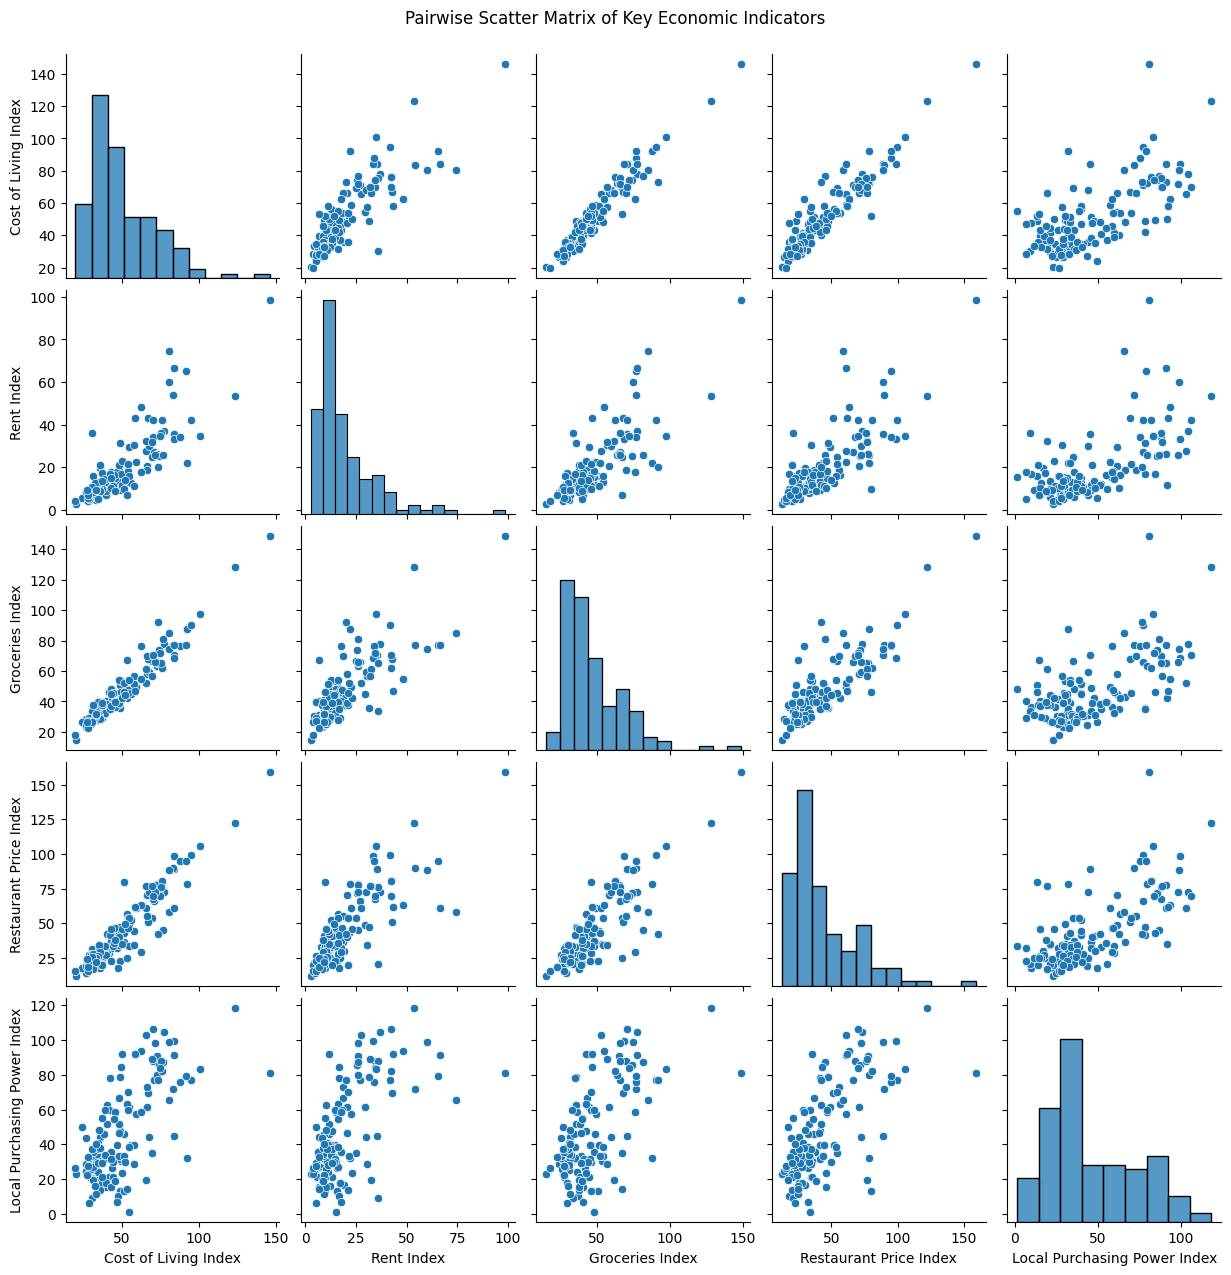

In [21]:
sns.pairplot(df[[
    "Cost of Living Index",
    "Rent Index",
    "Groceries Index",
    "Restaurant Price Index",
    "Local Purchasing Power Index"
]])
plt.suptitle("Pairwise Scatter Matrix of Key Economic Indicators", y=1.02)
plt.show()

**Conclusion:**

The pairwise scatter matrix reveals clear linear relationships among most cost-related indices:

* Strong positive correlations are observed between Cost of Living, Groceries, Restaurant Prices, and Rent, confirming they move in tandem.

* The Local Purchasing Power Index, however, shows greater dispersion and weaker linearity with cost variables — suggesting that high living expenses do not always align with lower affordability.

* The diagonal histograms show that most indices are right-skewed, indicating that a few countries exhibit extremely high costs or purchasing power compared to the majority.


This matrix serves as an important visual diagnostic tool, supporting earlier correlation findings while uncovering hidden patterns and exceptions in the global economic structure.

###**13. Custom Economic Health Score**

> **Economic Health = (Purchasing Power) / Weighted Average of Cost Factors**

This formula rewards countries with high purchasing power and penalizes those with high costs. The top scorers include a mix of **balanced economies and value-rich nations**, offering a unique lens on economic efficiency.

*Top 10 Economic Health Score Countries*

In [22]:
df["economic_health_score"] = (
    df["Local Purchasing Power Index"] /
    (0.4 * df["Cost of Living Index"] + 0.3 * df["Rent Index"] +
     0.15 * df["Groceries Index"] + 0.15 * df["Restaurant Price Index"])
)
top10_health = df.sort_values("economic_health_score", ascending=False).head(10)

(top10_health).head(10)


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,cluster,affordability_score,economic_health_score
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72,0,2.035203,2.768297
105,106,Saudi Arabia,50.41,11.67,32.25,42.57,35.50,91.85,2,1.822059,2.596430
113,114,South Africa,42.09,16.60,30.14,34.78,41.33,78.36,2,1.861725,2.357933
66,67,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86,0,1.621442,2.205405
91,92,Oman,49.42,16.77,34.11,46.51,43.24,84.24,2,1.704573,2.201691
74,75,Malaysia,37.02,9.87,24.29,39.45,20.84,55.30,0,1.493787,2.062471
18,19,Botswana,40.17,10.21,26.12,35.16,42.50,62.63,2,1.559124,2.034763
98,99,Poland,38.95,14.45,27.46,32.42,33.52,59.95,2,1.539153,2.011340
43,44,Germany,65.58,27.62,47.78,52.31,60.91,103.08,1,1.571821,2.001515
67,68,Kuwait,48.68,31.31,40.54,35.63,47.48,78.57,2,1.614010,1.900971


<ipython-input-23-b5068e8bc338>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Top 10 Countries by Economic Health Score')

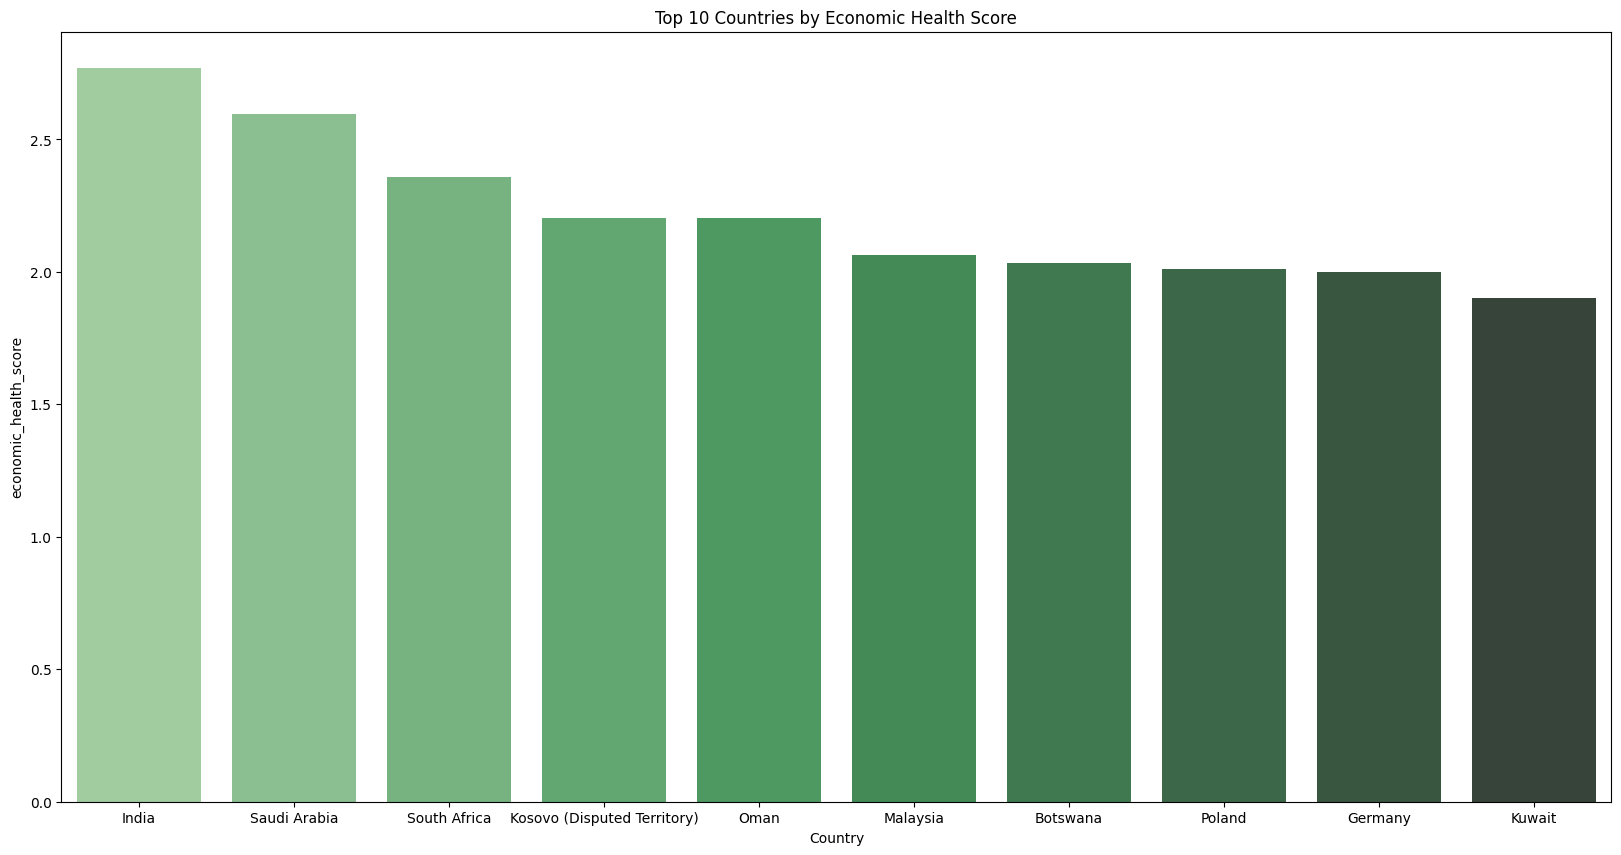

In [23]:

plt.figure(figsize=(20, 10))
sns.barplot(data=top10_health, x="Country", y="economic_health_score", palette="Greens_d")
plt.title("Top 10 Countries by Economic Health Score")

*Bottom 10 Economic Health Score*

In [24]:
df["economic_health_score"] = (
    df["Local Purchasing Power Index"] /
    (0.4 * df["Cost of Living Index"] + 0.3 * df["Rent Index"] +
     0.15 * df["Groceries Index"] + 0.15 * df["Restaurant Price Index"])
)

bottom10_health = df.sort_values("economic_health_score", ascending=True).head(10)
bottom10_health

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,cluster,affordability_score,economic_health_score
29,30,Cuba,55.00,15.23,36.36,47.93,33.54,1.45,0,0.026364,0.037381
59,60,Ivory Coast,47.03,17.68,33.27,40.22,31.99,6.92,0,0.147140,0.198011
88,89,Nigeria,30.49,35.99,33.07,33.65,20.92,9.34,0,0.306330,0.299565
38,39,Ethiopia,47.49,16.88,33.14,36.68,18.03,10.15,0,0.213729,0.314568
120,121,Syria,28.75,5.17,17.70,29.34,22.81,6.59,0,0.229217,0.315711
117,118,Suriname,51.78,9.71,32.06,45.92,79.61,13.44,2,0.259560,0.316574
108,109,Seychelles,65.93,32.35,50.19,61.55,77.01,19.43,2,0.294707,0.341710
21,22,Cambodia,49.11,15.68,33.44,50.61,22.90,13.32,0,0.271228,0.376542
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41,2,0.271170,0.388955
127,128,Uganda,33.50,9.19,22.10,31.00,24.85,11.41,0,0.340597,0.465059


<ipython-input-30-edc9a430be98>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Bottom 10 Countries by Economic Health Score')

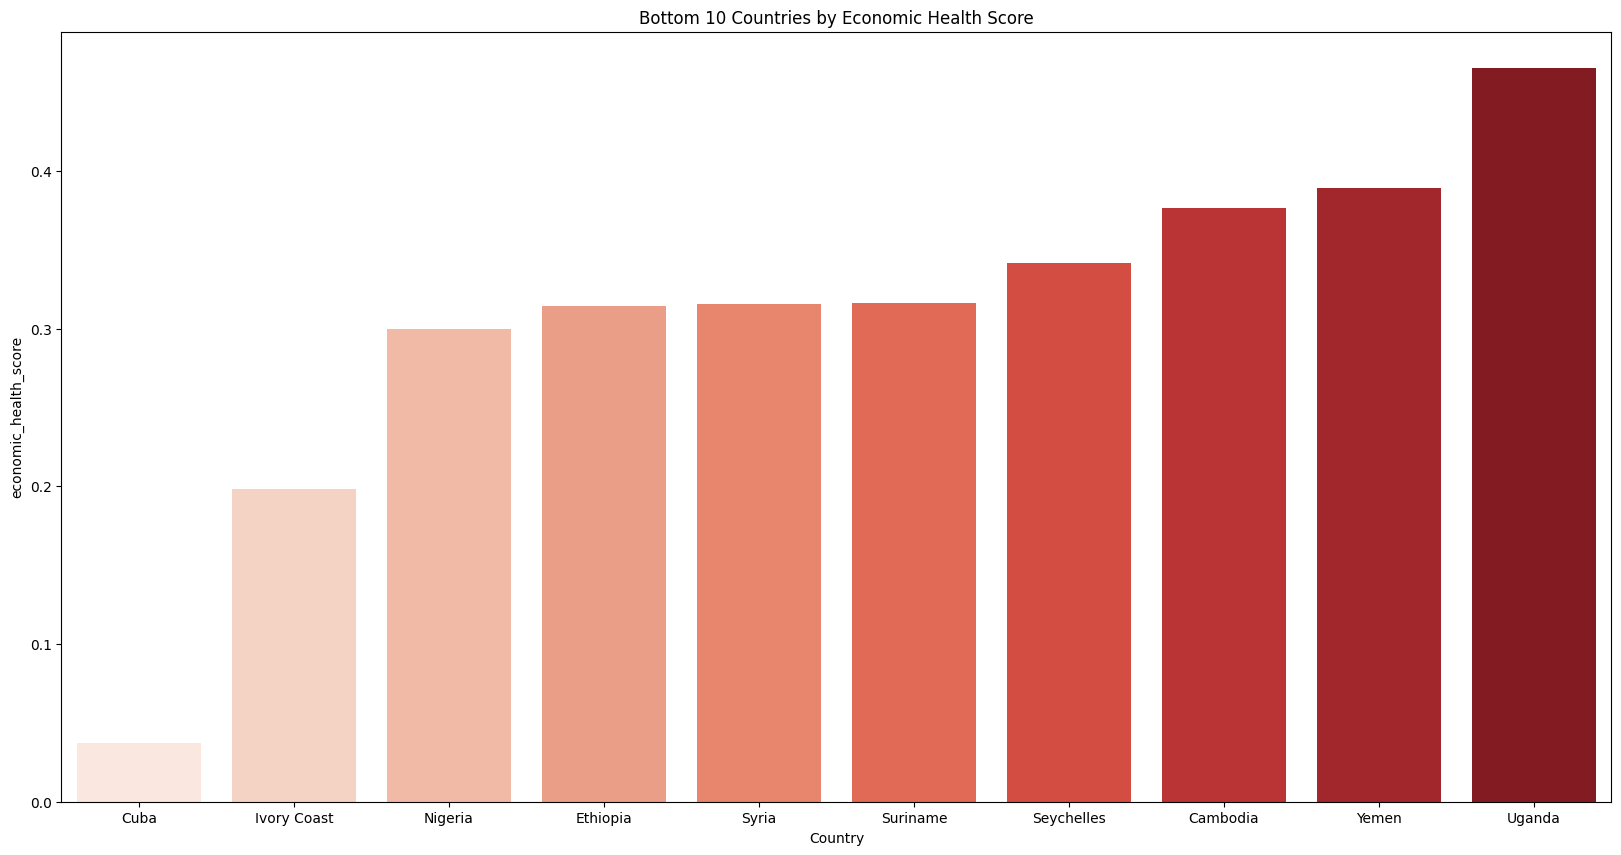

In [30]:
plt.figure(figsize=(20, 10))
sns.barplot(data=bottom10_health, x="Country", y="economic_health_score", palette="Reds")
plt.title("Bottom 10 Countries by Economic Health Score")

**Conclusion: Economic Health Score – Top vs Bottom Insights**

To synthesize affordability and financial strength into a single interpretable metric, we engineered a Custom Economic Health Score.

This score combines the Local Purchasing Power Index (numerator) with a weighted combination of cost-based indices (denominator), accounting for:

* 40% Cost of Living Index

* 30% Rent Index

* 15% Groceries Index

* 15% Restaurant Price Index


**Key Insights:**

*🌟 Top Performers:*

* Countries like India, Saudi Arabia, and South Africa top the chart with the highest economic health scores, reflecting strong purchasing power relative to living costs.
* Their high affordability and controlled expenditure across essentials contribute significantly to their favorable positions.

*🚨 Lowest Performers:*

* Countries such as Cuba, Ivory Coast, and Nigeria rank lowest on the scale.

* These countries suffer from either very low purchasing power, disproportionately high costs, or both — signaling potential economic imbalance or household strain.

>This engineered indicator offers a composite view of macroeconomic well-being, balancing cost burdens with financial capacity. It’s especially helpful when evaluating countries with complex affordability structures where cost alone is not enough to assess quality of life.

###**14. Data Limitation and Assumptions:**

**Limitations:**

- The dataset represents a **snapshot for the year 2022** and does **not include historical or time-series data**, which limits the ability to analyze trends or forecast reliably.
- All indices (Cost of Living, Rent, Groceries, etc.) are **relative indices**, typically benchmarked against **New York = 100**. They are **not absolute monetary values**, which restricts direct cost comparisons.
- The **Local Purchasing Power Index** measures average income vs. local price levels, but it doesn't account for **inequality**, **urban-rural disparities**, or **standard of living**.
- Some entries might be missing detailed economic or political context (e.g., tax structure, currency inflation, social services).


**Assumptions:**
  - All index values are accurate and normalized
  - The affordability score assumes a **linear inverse relationship** between cost and purchasing power

> 📌 These assumptions and limitations should be acknowledged before drawing broad economic policy conclusions.

###**Executive Summary**

This project offers a complete analysis of global **Cost of Living and Purchasing Power indices** using publicly available data for 2022.

Here's a summary of the approach and findings:

####**🔍 Analytical Highlights:**
- **Top 20 countries by cost** include Bermuda, Switzerland, and Norway.
- Countries with **high cost + high purchasing power** (e.g., Switzerland, Singapore) are relatively balanced.
- **Affordability Score** = Purchasing Power / Cost ➝ revealed India, South Africa, and Saudi Arabia as top performers.
- **Clustering and PCA** categorized nations into economic zones based on affordability and expense.
- **Trendline regression** confirmed a moderate positive relationship between cost and purchasing power.
- A **radar chart** contrasted India against developed peers across 5 key dimensions.
- **Pairwise scatter matrix** validated earlier correlation and PCA insights visually.


####**💡 Interpretation:**

* The findings suggest that high cost **does not necessarily imply low affordability**, and countries with moderate income but low expenses can offer high value to residents.
* Regional economic efficiency is better understood through normalized, multidimensional comparisons.

> ➡️ These results are highly useful for comparative economic profiling, investment perspectives, and macroeconomic insights.

###**Final Conclusion**

> This project successfully demonstrates the use of **data science** and **economic indicators** to analyze global affordability in a structured, visual, and insightful manner.

**✅ Major Takeaways:**

- Countries like **Switzerland and Singapore** maintain high cost structures but balance them with strong purchasing power.
- Economies such as **India** and **South Africa** demonstrate that low cost with moderate income can yield high affordability.
- Visual techniques like **PCA**, **clustering**, **trendlines**, and **radar plots** greatly enhance interpretability.
- Combining normalized indices and custom metrics like the **Affordability Score** provided unique economic insights.

**📌 Future extensions could include:**

- Time-series forecasting (ARIMA/SARIMA) with historical data
- Integration of GDP, employment, or taxation metrics
- Interactive dashboards (e.g., Streamlit, Tableau)

> Overall, this analysis offers a **holistic view of global living economics** and sets the stage for more advanced financial modeling and decision support.